# SNAP Facebook Ego Network Analysis

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fb=nx.read_edgelist('facebook_combined.txt',create_using =nx.Graph(), nodetype =int)
print (nx.info(fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


## The network has 4039 users and 88234 friendship connections with an average node degree of 43

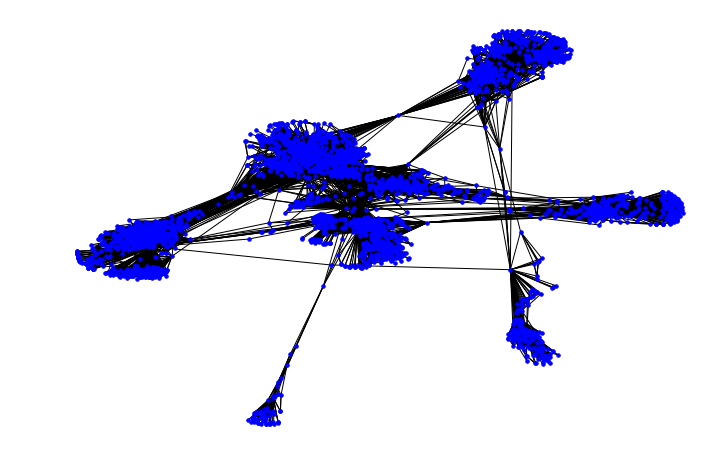

In [3]:
plt.figure(figsize =(12,8))
plt.axis('off')
nx.draw_networkx(fb,with_labels =False, node_size =12, node_color ='b')

## Some Connectivity Investigating & Path Analysis

In [4]:
connected = nx.is_connected(fb)
print(connected)

#shortest paths from centralities to the center node
print("Shortest path from Degree Centrality to Center Node:", nx.shortest_path(fb,source=107,target=567))
print("Shortest path from Closeness Centrality to Center Node:",nx.shortest_path(fb,source=107,target=567))
print("Shortest path from Betweenness Centrality to Center Node:",nx.shortest_path(fb,source=107,target=567))
print("Shortest path from Eigenvector Centrality to Center Node:",nx.shortest_path(fb,source=1912,target=567))


print(len(nx.minimum_edge_cut(fb)))

True
Shortest path from Degree Centrality to Center Node: [107, 420, 567]
Shortest path from Closeness Centrality to Center Node: [107, 420, 567]
Shortest path from Betweenness Centrality to Center Node: [107, 420, 567]
Shortest path from Eigenvector Centrality to Center Node: [1912, 428, 567]
1


## What is the center node in the network?

In [4]:
print('The center node is: ', nx.center(fb))

The center node is:  [567]


## What is the most popular node in the network?

In [6]:
degree_centrality = nx.degree_centrality(fb)

# To find top 10 popular nodes in the network
top10_degree_nodes = sorted(degree_centrality.items(),
                           key = lambda x: x[1],
                           reverse = True)[:5]
print('\n Top 5 popular node:',top10_degree_nodes)

print('\n The most popular node :', list(reversed(sorted((value, node)
                                for (node, value) in degree_centrality.items())))[0][1])


 Top 5 popular node: [(107, 0.258791480931154), (1684, 0.1961367013372957), (1912, 0.18697374938088163), (3437, 0.13546310054482416), (0, 0.08593363051015354)]

 The most popular node : 107


## Computes the betweeness, closeness, eigenvector centrality, and cluster coefficients and prints top 10 central nodes for each measure

In [22]:
betweenness_fb = nx.betweenness_centrality(fb)
closeness_fb = nx.closeness_centrality(fb)
eigen_fb = nx.eigenvector_centrality(fb)
clusters_fb = nx.clustering(fb)
#print(clusters_fb)

top_betweenness= sorted(betweenness_fb.items(),
                       key= lambda x: x[1],
                       reverse = True)[:5]
top_closeness= sorted(closeness_fb.items(),
                       key= lambda x: x[1],
                       reverse = True)[:5]
top_eigen= sorted(eigen_fb.items(),
                       key= lambda x: x[1],
                       reverse = True)[:5]
top_clusters= sorted(clusters_fb.items(),
                       key= lambda x: x[1],
                       reverse = True)[:1000]


In [23]:
print('Top 5 betweenness nodes are:',top_betweenness)
print('\nTop 5 closeness nodes are: ', top_closeness)
print(' \nTop 5 eigen nodes are: ',top_eigen)
print(' \nTop 50 clustering coefficients are: ',top_clusters)


Top 5 betweenness nodes are: [(107, 0.4805180785560147), (1684, 0.33779744973020004), (3437, 0.23611535735892794), (1912, 0.22929533958687848), (1085, 0.14901509211665162)]

Top 5 closeness nodes are:  [(107, 0.45969945355191255), (58, 0.3974018305284913), (428, 0.3948371956585509), (563, 0.3939127889961955), (1684, 0.39360561458231796)]
 
Top 5 eigen nodes are:  [(1912, 0.09540696149067635), (2266, 0.08698327767886556), (2206, 0.08605239270584346), (2233, 0.08517340912756602), (2464, 0.08427877475676095)]
 
Top 50 clustering coefficients are:  [(32, 1.0), (33, 1.0), (35, 1.0), (42, 1.0), (44, 1.0), (46, 1.0), (47, 1.0), (52, 1.0), (63, 1.0), (70, 1.0), (71, 1.0), (76, 1.0), (78, 1.0), (86, 1.0), (90, 1.0), (102, 1.0), (110, 1.0), (112, 1.0), (131, 1.0), (135, 1.0), (138, 1.0), (145, 1.0), (153, 1.0), (154, 1.0), (160, 1.0), (183, 1.0), (191, 1.0), (195, 1.0), (201, 1.0), (205, 1.0), (207, 1.0), (216, 1.0), (218, 1.0), (220, 1.0), (228, 1.0), (233, 1.0), (234, 1.0), (241, 1.0), (244, 1

In [10]:
import community
import numpy as np

 Communities found in the network:  15


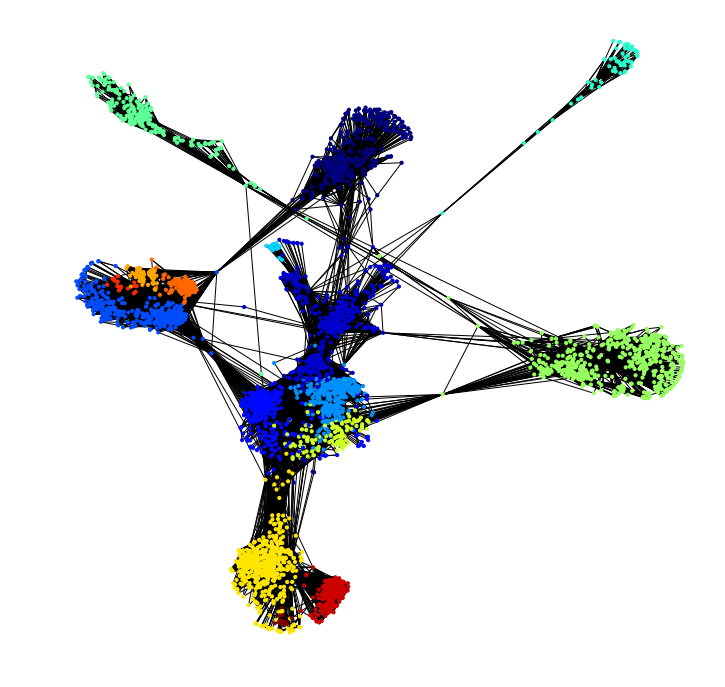

In [4]:
pos_fb = nx.spring_layout(fb, iterations =1000)
parts = community.best_partition(fb)
print(' Communities found in the network: ', max(parts.values())+1) #adding 1 because the cummunities values start at 0
#and then we are taking the max of those values, so we need to add 1 to get number of communities


## Graph with communities dectection
plt.figure(figsize=(12, 12))
spring_pos = nx.spring_layout(fb)
parts = community.best_partition(fb)
values = [parts.get(node) for node in fb.nodes()]

plt.axis("off")
nx.draw_networkx(fb, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=10, with_labels=False)
plt.show()

## Applying some clustering algorithms to the network

In [29]:
#looking at the triangles for the center and centralities nodes
triangles_fb = nx.triangles(fb)
top_triangles = sorted(triangles_fb.items(),
                      key = lambda x: x[1],
                      reverse = True)[:10]



print("Top 10 triangles nodes", top_triangles)
print("Triangles for the center node, the Degree/Closeness/Betweenness Centrality, and the Eigenvector Centrality:",list(nx.triangles(fb,(567,107,1912)).values()))
print("Transitivity of the network:",nx.transitivity(fb))
print("The average Clustering Coefficient of the network:",nx.average_clustering(fb))

831
Top 10 triangles nodes [(1912, 30025), (107, 26750), (2347, 16863), (2266, 16174), (2206, 15844), (2543, 15502), (2233, 15471), (2464, 15213), (2142, 15165), (2218, 15165)]
Triangles for the center node, the Degree/Closeness/Betweenness Centrality, and the Eigenvector Centrality: [30025, 26750, 831]
Transitivity of the network: 0.5191742775433075
The average Clustering Coefficient of the network: 0.6055467186200871


## Visualizing the 10 individual ego networks

In [13]:
# load directory
%ls  

facebook_combined.txt                           socfb-Columbia2.mtx
Facebook.gar/                                   socfb-Harvard1.mtx
FB_public_data_MIGHT BE NO GO.ipynb             socfb-Rice31.mtx
packages/                                       socfb-Stanford3.mtx
SNAP Facebook ego network analysis-Copy1.ipynb  socfb-Texas80.mtx
SNAP Facebook ego network analysis.ipynb        socfb-TexasA&M84.mtx
socfb-Baylor93.mtx                              socfb-Yale4.mtx


In [14]:
%cd Facebook.gar

/home/cc/Facebook.gar


In [15]:
%bookmark fbdata
%ls

0.circles      1684.circles    3437.circles    3980.circles    686.circles
0.edges        1684.edges      3437.edges      3980.edges      686.edges
0.egofeat      1684.egofeat    3437.egofeat    3980.egofeat    686.egofeat
0.feat         1684.feat       3437.feat       3980.feat       686.feat
0.featnames    1684.featnames  3437.featnames  3980.featnames  686.featnames
107.circles    1912.circles    348.circles     414.circles     698.circles
107.edges      1912.edges      348.edges       414.edges       698.edges
107.egofeat    1912.egofeat    348.egofeat     414.egofeat     698.egofeat
107.feat       1912.feat       348.feat        414.feat        698.feat
107.featnames  1912.featnames  348.featnames   414.featnames   698.featnames


In [16]:
# let's retrieve the list of edges files. Assign a new variable names files
files =!ls -1 -S | grep .edges  
print(len(files))

10


In [17]:
files

['1912.edges',
 '107.edges',
 '1684.edges',
 '3437.edges',
 '348.edges',
 '0.edges',
 '414.edges',
 '686.edges',
 '698.edges',
 '3980.edges']

## Create a graph for each ego network

Name: 
Type: Graph
Number of nodes: 1034
Number of edges: 26749
Average degree:  51.7389


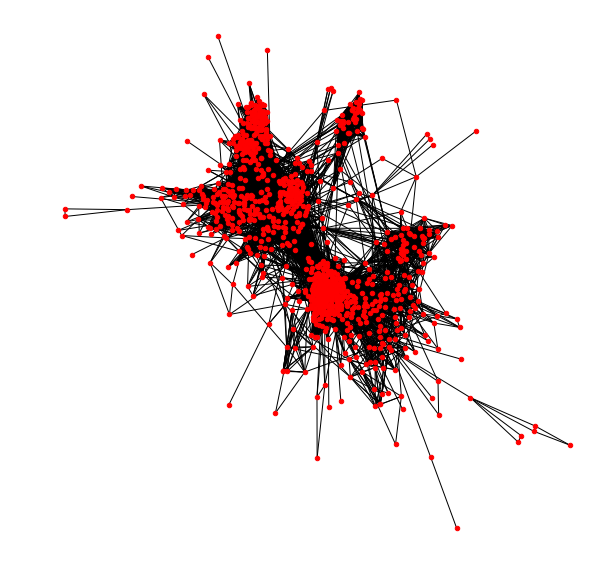

In [16]:
g=nx.read_edgelist("107.edges", create_using =nx.Graph())
print(nx.info(g))

#draw
plt.figure(figsize = (10,10))
plt.axis('off')
nx.draw_networkx(g, with_labels = False, node_size =20)

In [15]:
feature =!ls -1 -S | grep .egofeat  
print(len(feature))
feature

10


['107.egofeat',
 '1912.egofeat',
 '1684.egofeat',
 '3437.egofeat',
 '0.egofeat',
 '348.egofeat',
 '414.egofeat',
 '686.egofeat',
 '698.egofeat',
 '3980.egofeat']

 Communities found in the network:  7


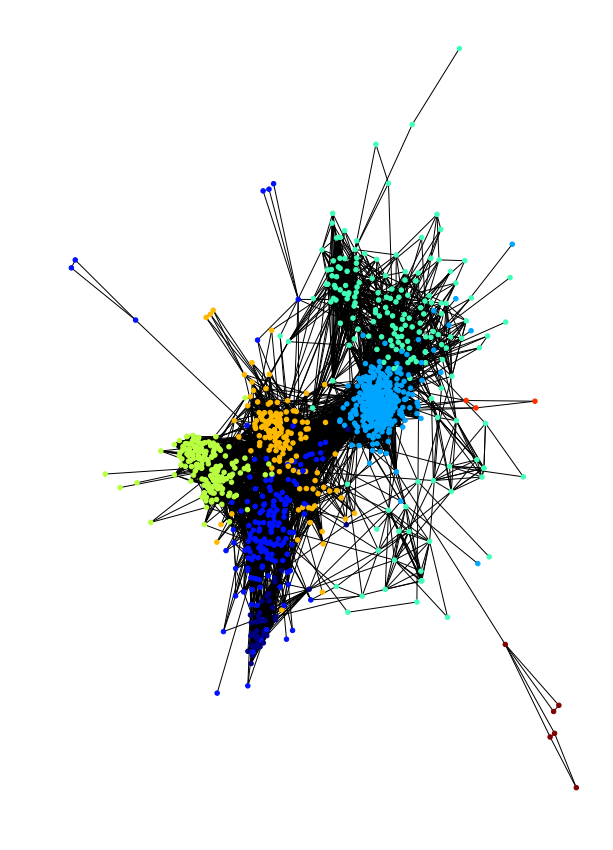

In [18]:
parts = community.best_partition(g)
values = [parts.get(node) for node in g.nodes()]
print(' Communities found in the network: ', max(parts.values())+1)

# drawing
spring_pos = nx.spring_layout(g)
plt.figure(figsize =(10,15))
plt.axis("off")
nx.draw_networkx(g, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=20, with_labels=False)
plt.show()

Name: 
Type: Graph
Number of nodes: 52
Number of edges: 146
Average degree:   5.6154


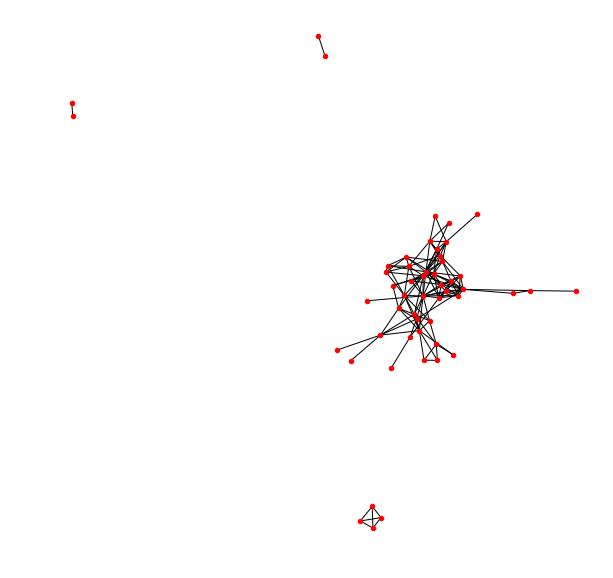

In [18]:
g2=nx.read_edgelist("3980.edges", create_using =nx.Graph())
print(nx.info(g2))

#draw
plt.figure(figsize = (10,10))
plt.axis('off')
nx.draw_networkx(g2, with_labels = False, node_size =20)



 Communities found in the network:  7


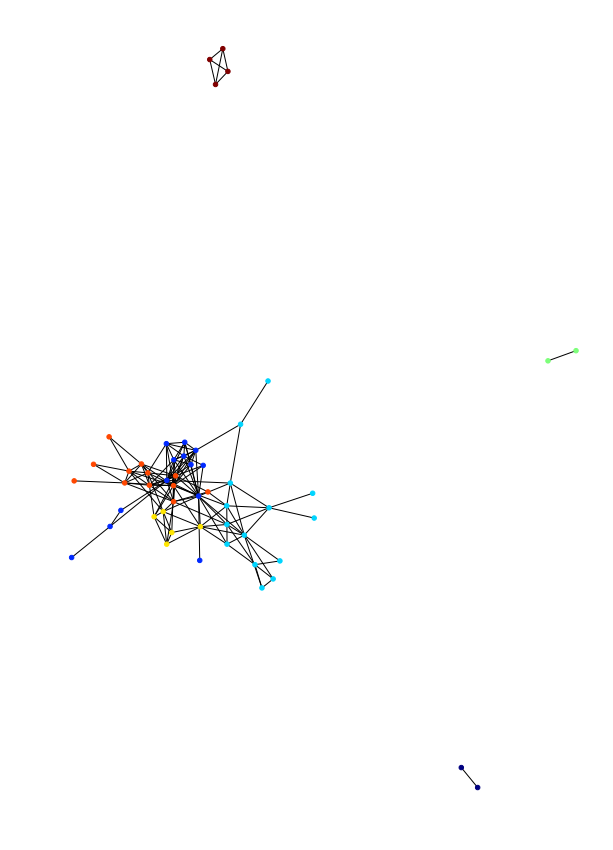

In [30]:
parts = community.best_partition(g2)
values = [parts.get(node) for node in g2.nodes()]
print(' Communities found in the network: ', max(parts.values())+1)

#node membership
#for node in g2.nodes:
    #print(node, parts.get(node))

    
# drawing
spring_pos = nx.spring_layout(g2)
plt.figure(figsize =(10,15))
plt.axis("off")
nx.draw_networkx(g2, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=20, with_labels=False)
plt.show()

## Opened up .feat file with excel and can manually link certain features with specific nodes in each community to then describe them using .featnames file

Name: 
Type: Graph
Number of nodes: 333
Number of edges: 2519
Average degree:  15.1291


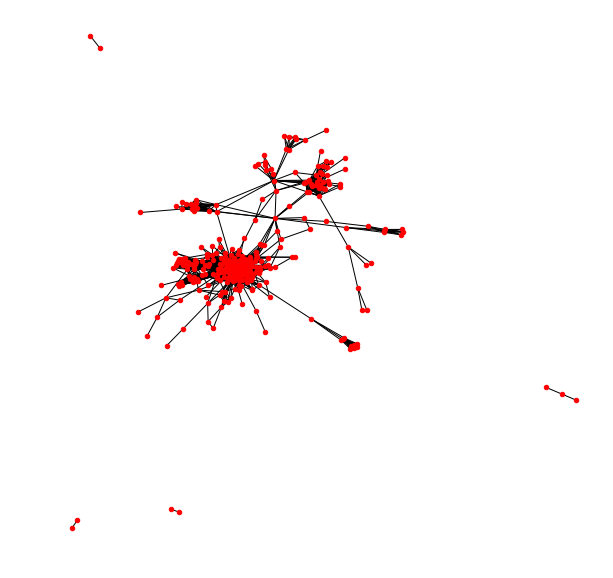

In [37]:
g3=nx.read_edgelist("0.edges", create_using =nx.Graph())
print(nx.info(g3))

#draw
plt.figure(figsize = (10,10))
plt.axis('off')
nx.draw_networkx(g3, with_labels = False, node_size =20)

 Communities found in the network:  13


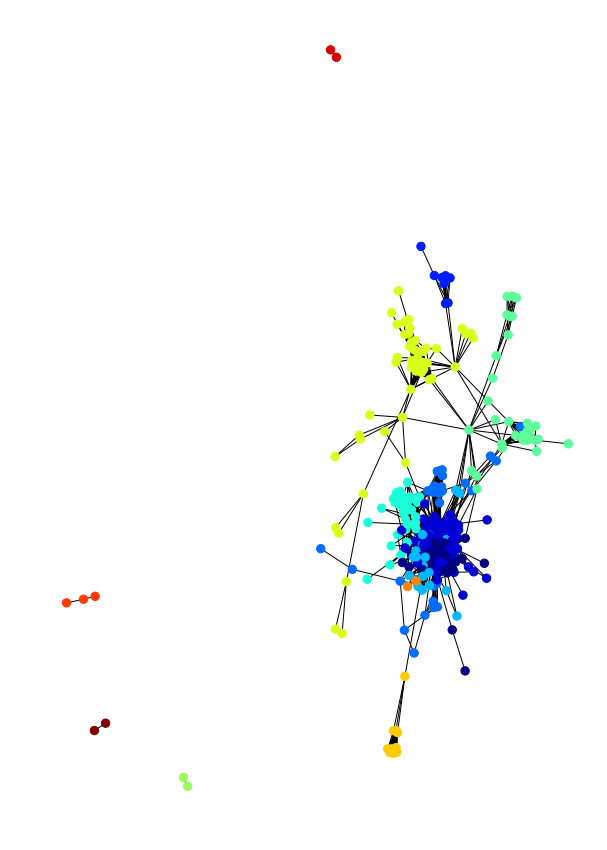

In [38]:
parts = community.best_partition(g3)
values = [parts.get(node) for node in g3.nodes()]
print(' Communities found in the network: ', max(parts.values())+1)

# drawing
spring_pos = nx.spring_layout(g3)
plt.figure(figsize =(10,15))
plt.axis("off")
nx.draw_networkx(g3, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=70, with_labels=False)
plt.show()

Name: 
Type: Graph
Number of nodes: 747
Number of edges: 30025
Average degree:  80.3882


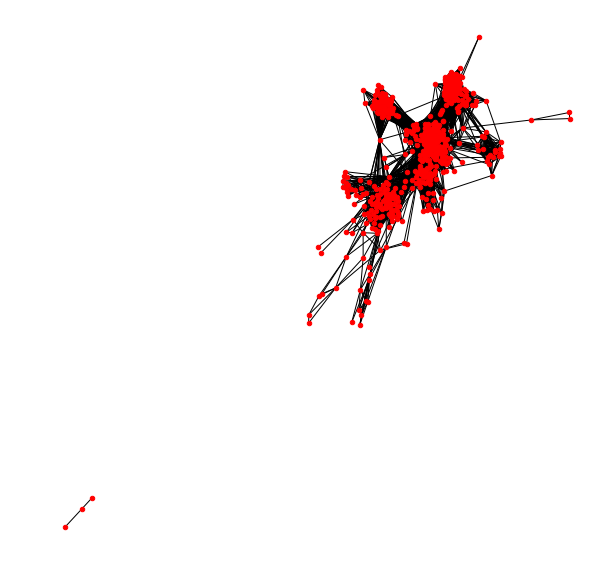

In [39]:
g4=nx.read_edgelist("1912.edges", create_using =nx.Graph())
print(nx.info(g4))

#draw
plt.figure(figsize = (10,10))
plt.axis('off')
nx.draw_networkx(g4, with_labels = False, node_size =20)

 Communities found in the network:  6


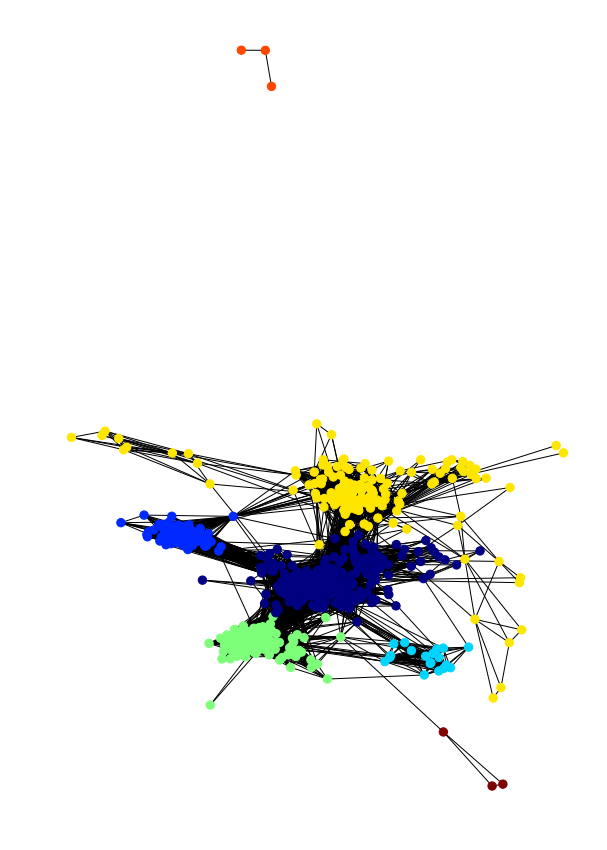

In [40]:
parts = community.best_partition(g4)
values = [parts.get(node) for node in g4.nodes()]
print(' Communities found in the network: ', max(parts.values())+1)

# drawing
spring_pos = nx.spring_layout(g4)
plt.figure(figsize =(10,15))
plt.axis("off")
nx.draw_networkx(g4, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=70, with_labels=False)
plt.show()

Name: 
Type: Graph
Number of nodes: 786
Number of edges: 14024
Average degree:  35.6845


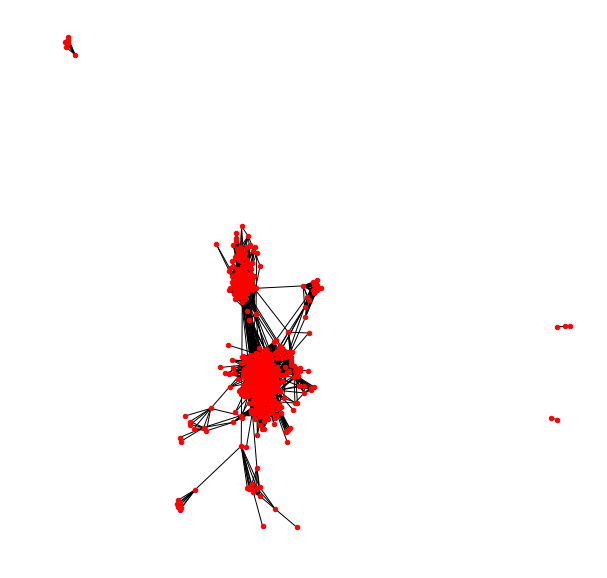

In [41]:
g5=nx.read_edgelist("1684.edges", create_using =nx.Graph())
print(nx.info(g5))

#draw
plt.figure(figsize = (10,10))
plt.axis('off')
nx.draw_networkx(g5, with_labels = False, node_size =20)

 Communities found in the network:  8


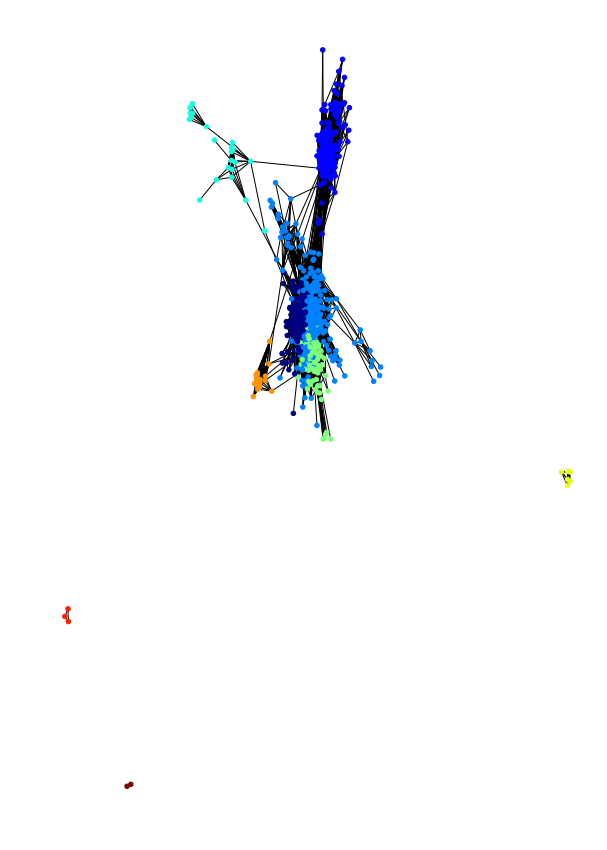

In [42]:
parts = community.best_partition(g5)
values = [parts.get(node) for node in g5.nodes()]
print(' Communities found in the network: ', max(parts.values())+1)

# drawing
spring_pos = nx.spring_layout(g5)
plt.figure(figsize =(10,15))
plt.axis("off")
nx.draw_networkx(g5, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=20, with_labels=False)
plt.show()

Name: 
Type: Graph
Number of nodes: 534
Number of edges: 4813
Average degree:  18.0262


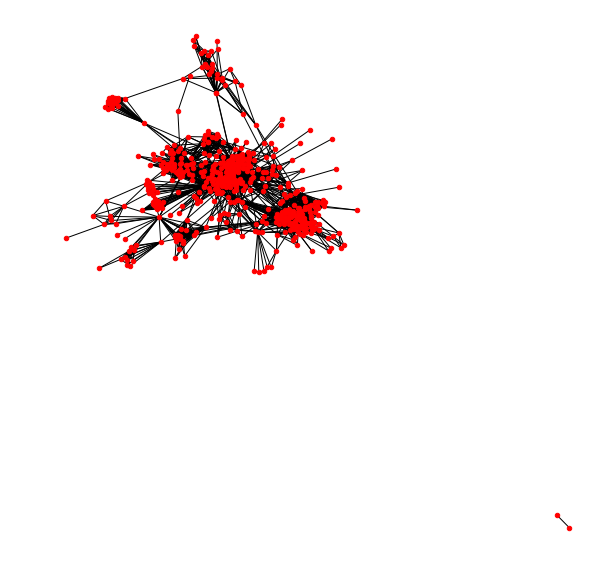

In [43]:
g6=nx.read_edgelist("3437.edges", create_using =nx.Graph())
print(nx.info(g6))

#draw
plt.figure(figsize = (10,10))
plt.axis('off')
nx.draw_networkx(g6, with_labels = False, node_size =20)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



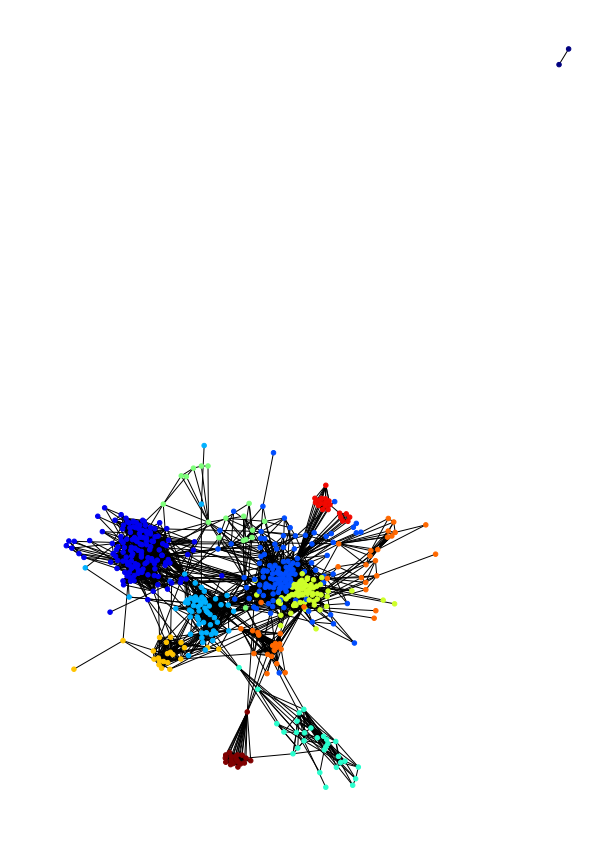

In [57]:
parts = community.best_partition(g6)
values = [parts.get(node) for node in g6.nodes()]
print(' Communities found in the network: ', max(parts.values())+1)


# drawing
spring_pos = nx.spring_layout(g6)
plt.figure(figsize =(10,15))
plt.axis("off")
nx.draw_networkx(g6, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=20, with_labels=False)
plt.show()


Name: 
Type: Graph
Number of nodes: 224
Number of edges: 3192
Average degree:  28.5000


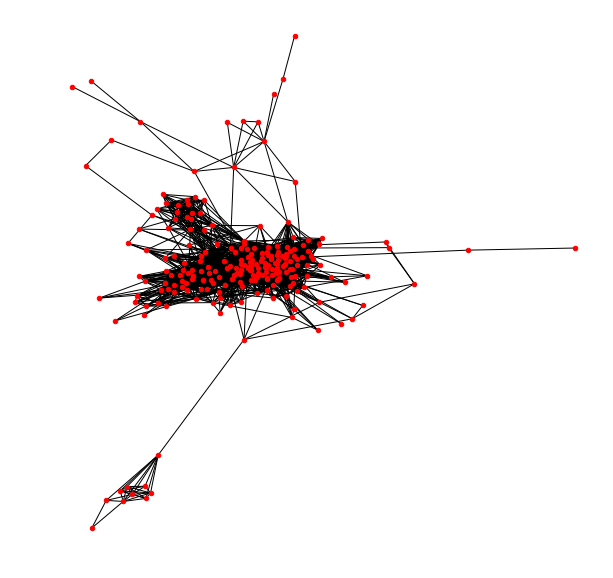

In [45]:
g7=nx.read_edgelist("348.edges", create_using =nx.Graph())
print(nx.info(g7))

#draw
plt.figure(figsize = (10,10))
plt.axis('off')
nx.draw_networkx(g7, with_labels = False, node_size =20)

 Communities found in the network:  6


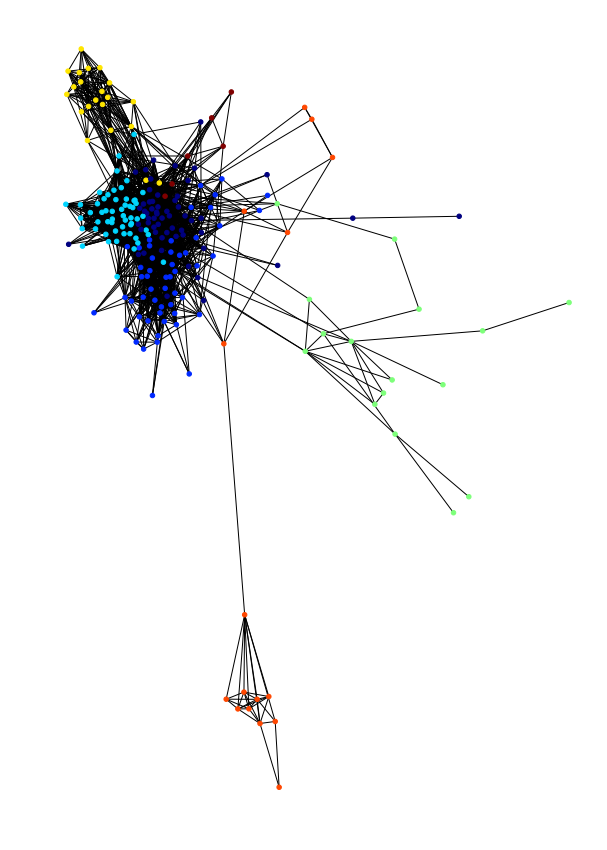

In [46]:
parts = community.best_partition(g7)
values = [parts.get(node) for node in g7.nodes()]
print(' Communities found in the network: ', max(parts.values())+1)

# drawing
spring_pos = nx.spring_layout(g7)
plt.figure(figsize =(10,15))
plt.axis("off")
nx.draw_networkx(g7, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=20, with_labels=False)
plt.show()

Name: 
Type: Graph
Number of nodes: 150
Number of edges: 1693
Average degree:  22.5733


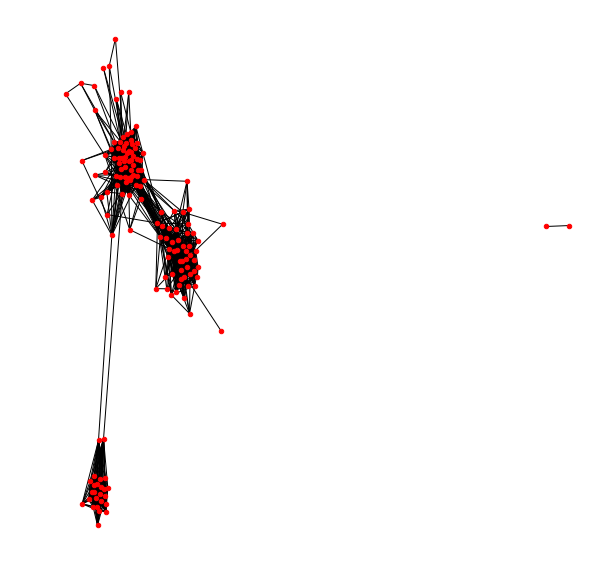

In [47]:
g8=nx.read_edgelist("414.edges", create_using =nx.Graph())
print(nx.info(g8))

#draw
plt.figure(figsize = (10,10))
plt.axis('off')
nx.draw_networkx(g8, with_labels = False, node_size =20)

 Communities found in the network:  4


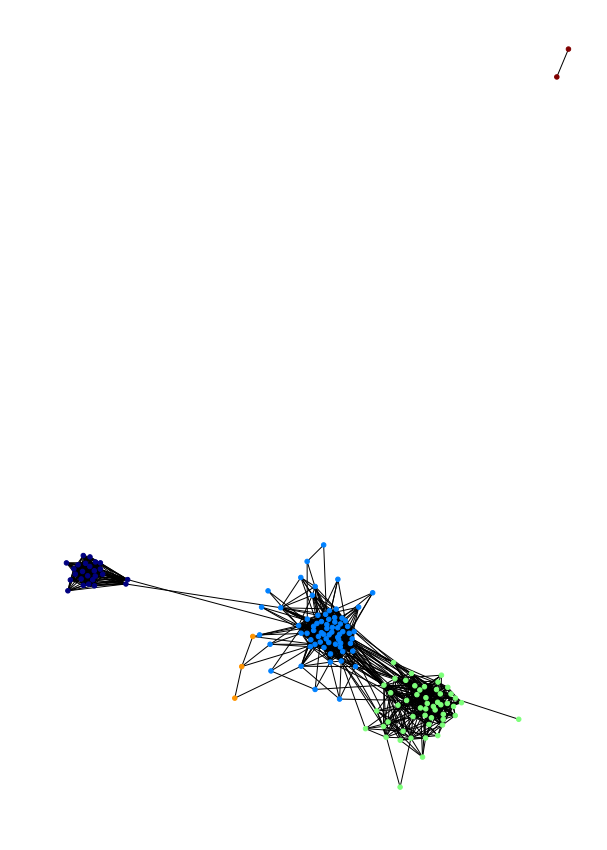

In [48]:
parts = community.best_partition(g8)
values = [parts.get(node) for node in g8.nodes()]
print(' Communities found in the network: ', max(parts.values())+1)

# drawing
spring_pos = nx.spring_layout(g8)
plt.figure(figsize =(10,15))
plt.axis("off")
nx.draw_networkx(g8, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=20, with_labels=False)
plt.show()

Name: 
Type: Graph
Number of nodes: 168
Number of edges: 1656
Average degree:  19.7143


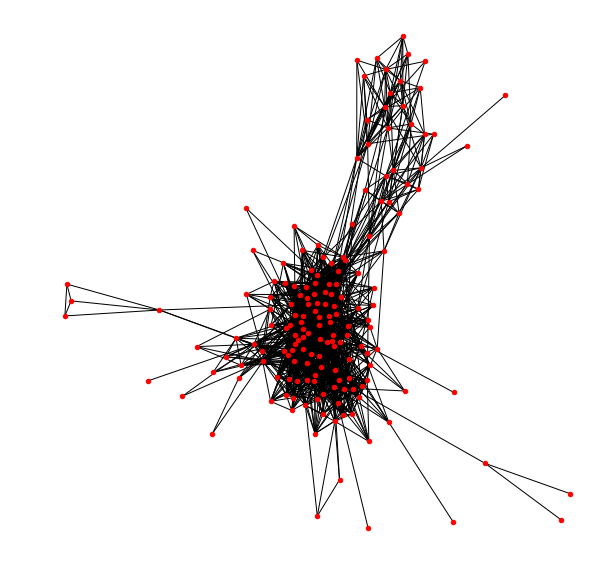

In [49]:
g9=nx.read_edgelist("686.edges", create_using =nx.Graph())
print(nx.info(g9))

#draw
plt.figure(figsize = (10,10))
plt.axis('off')
nx.draw_networkx(g9, with_labels = False, node_size =20)

 Communities found in the network:  5


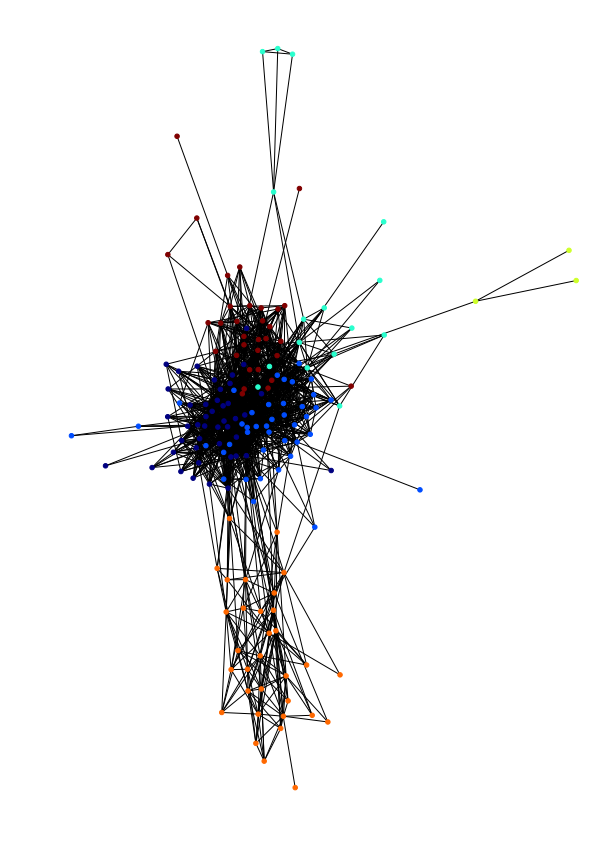

In [50]:
parts = community.best_partition(g9)
values = [parts.get(node) for node in g9.nodes()]
print(' Communities found in the network: ', max(parts.values())+1)

# drawing
spring_pos = nx.spring_layout(g9)
plt.figure(figsize =(10,15))
plt.axis("off")
nx.draw_networkx(g9, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=20, with_labels=False)
plt.show()

Name: 
Type: Graph
Number of nodes: 61
Number of edges: 270
Average degree:   8.8525


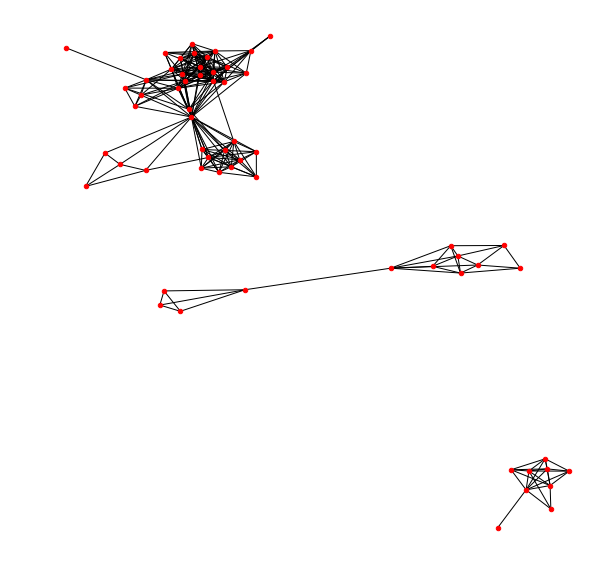

In [51]:
g10=nx.read_edgelist("698.edges", create_using =nx.Graph())
print(nx.info(g10))

#draw
plt.figure(figsize = (10,10))
plt.axis('off')
nx.draw_networkx(g10, with_labels = False, node_size =20)

 Communities found in the network:  4


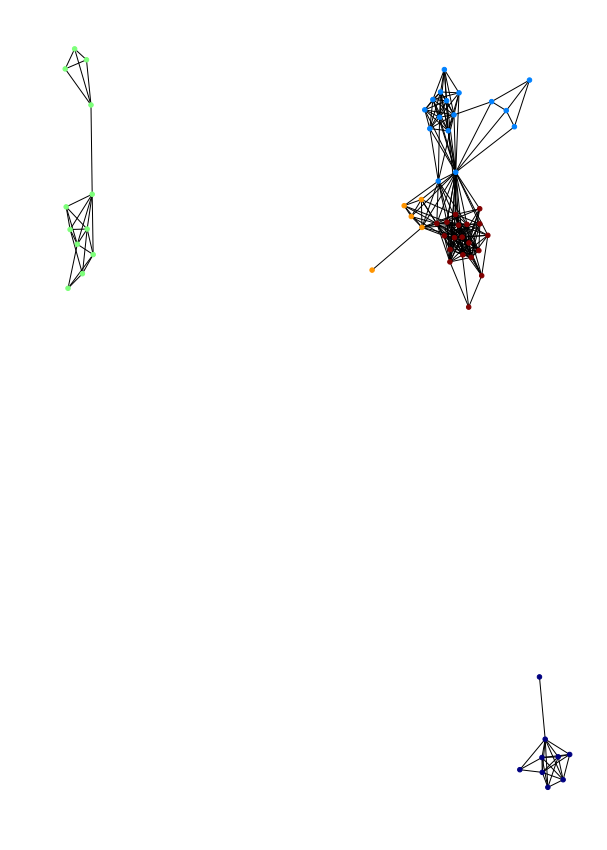

In [52]:
parts = community.best_partition(g10)
values = [parts.get(node) for node in g10.nodes()]
for part in parts:
    if node 
print(' Communities found in the network: ', max(parts.values())+1)

# drawing
spring_pos = nx.spring_layout(g10)
plt.figure(figsize =(10,15))
plt.axis("off")
nx.draw_networkx(g10, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=20, with_labels=False)
plt.show()

In [28]:
dendrogram = community.generate_dendrogram(g)
print(dendrogram)



[{'1675': 0, '1098': 9, '1250': 0, '1181': 0, '1053': 3, '1894': 6, '1472': 1, '1249': 1, '1284': 8, '1532': 0, '1184': 0, '538': 4, '1813': 0, '966': 5, '1125': 5, '941': 6, '1151': 5, '580': 4, '1897': 1, '1147': 1, '1013': 4, '1348': 1, '1817': 7, '1014': 6, '1775': 0, '1510': 1, '1214': 5, '1192': 8, '1782': 0, '1030': 16, '1036': 8, '1281': 6, '1824': 6, '1680': 8, '1615': 9, '1520': 0, '1605': 5, '1400': 4, '1230': 0, '1676': 9, '1084': 5, '1598': 5, '1748': 1, '1822': 12, '1032': 6, '376': 4, '1618': 0, '1440': 7, '1662': 5, '1023': 9, '1065': 1, '1022': 1, '1049': 0, '1683': 0, '1173': 5, '1095': 4, '1751': 6, '1048': 0, '1500': 1, '1876': 1, '1403': 3, '1311': 1, '1603': 0, '1321': 7, '1566': 2, '1389': 0, '1823': 0, '1868': 5, '1684': 7, '1790': 4, '1309': 6, '1757': 0, '1900': 5, '1681': 1, '1234': 2, '1606': 4, '1731': 2, '428': 4, '1893': 6, '1372': 2, '930': 4, '1135': 0, '348': 4, '1128': 0, '1719': 9, '1628': 8, '1812': 6, '1479': 8, '925': 0, '1223': 4, '1457': 5, '179

In [27]:
print(community.partition_at_level(dendrogram, len(dendrogram)-1))

{'1675': 0, '1460': 0, '1250': 0, '1181': 0, '1053': 3, '1170': 1, '1472': 1, '1488': 0, '1284': 4, '1532': 0, '1184': 0, '538': 2, '1813': 0, '966': 0, '1125': 0, '941': 4, '1151': 0, '580': 2, '1897': 1, '1147': 1, '1013': 2, '1348': 1, '1817': 3, '1014': 4, '1775': 0, '1510': 1, '1214': 0, '1192': 4, '1782': 0, '1799': 0, '1036': 4, '1281': 4, '1680': 4, '1615': 3, '1520': 0, '1605': 0, '1400': 2, '1230': 0, '1676': 3, '1482': 1, '1598': 0, '1748': 1, '1822': 3, '1032': 4, '376': 2, '1618': 0, '1658': 1, '1662': 0, '1077': 3, '1422': 2, '1022': 1, '1499': 3, '1049': 0, '1683': 0, '1173': 0, '1095': 2, '1751': 4, '1048': 0, '1500': 1, '1876': 1, '1403': 3, '1311': 1, '1603': 0, '637': 2, '1321': 3, '1566': 2, '1389': 0, '1823': 0, '1118': 5, '1684': 3, '1790': 2, '1309': 4, '1757': 0, '1900': 0, '1681': 1, '1234': 2, '1606': 2, '1731': 2, '428': 2, '1893': 4, '1372': 2, '930': 2, '1135': 0, '348': 2, '1128': 0, '1719': 3, '1628': 4, '1812': 4, '1479': 4, '925': 0, '1223': 2, '1746': 